In [5]:
import random
import numpy as np

import pickle
import gzip
import matplotlib.pyplot as plt


#### Load MNIST data

In [6]:
f = gzip.open('./data/mnist.pkl.gz', 'rb')
tr_d, va_d, te_d = pickle.load(f, encoding='latin1')
f.close()

def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the jth 
    position and zeroes elsewhere.\n
    ``8`` -> ``[[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[1.0],[0.0]]`` """
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

# training_data (50k num), validation_data (10k num), test_data (10k num)
(
    [ # lista ordinata che contiene le immagini sotto forma di np array lunghi 784 (28 x 28 pixel)
        [0.0, 0.532, ..., 0.0, 0.0],
        [0.0, 0.748, ..., 0.0, 0.0]
    ],
    [ # lista ordinata che idendifica il numero collegato all'immagine 
        3,
        5
    ]
) 

# np.reshape(x, (784, 1)) trasforma l'array lungo 784 in una matrice larga 1 e alta 784

# 50_000 numeri usati per allenare la rete
training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
training_results = [vectorized_result(y) for y in tr_d[1]]
training_data = list(zip(training_inputs, training_results))

# validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
# validation_data = list(zip(validation_inputs, va_d[1]))

# 10_000 numeri usati per testare la rete
test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
test_data = list(zip(test_inputs, te_d[1]))

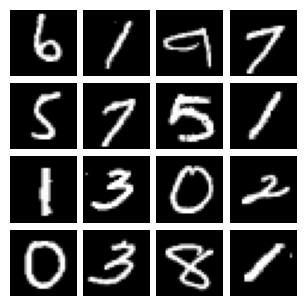

6 1 9 7 
5 7 5 1 
1 3 0 2 
0 3 8 1 



In [7]:
rand_set = random.randint(0, len(tr_d[0])-16)
image_matrices = [img.reshape((28, 28)) for img in tr_d[0][rand_set:rand_set+16]]

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(3, 3))

result_matrix = ""
for neuron_index in range(4):
    for layer_index in range(4):
        ax = axes[neuron_index, layer_index]
        ax.imshow(image_matrices[neuron_index*4 + layer_index], cmap='gray')
        ax.axis('off')
        result_matrix += f"{tr_d[1][rand_set+neuron_index*4+layer_index]} "
    result_matrix += "\n"

plt.tight_layout(pad=0.5) 
plt.show()
print(result_matrix)

### Rete Semplificata
###### 3 layers, 6 neuroni, 9 pesi e 4 biases
<img src="./img/rete_semplificata_5.svg" width="300px" />

In [69]:
class Network():

    def __init__(self, sizes):
        self.num_layers = len(sizes)
        
        self.sizes = sizes

        # self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.biases = []
        for y in sizes[1:]:
            self.biases.append(np.random.randn(y, 1))

        # per ogni layer (escluso il primo [:1])
        # appendo una matrice larga 1 e alta y
        # np.random.randn(y, 1) genera una matrice larga y e lunga x piena di numeri casuale generati secondo la ditribuzione gaussiana

        [
            [ # biases del 2° layer
                [-0.18229955], # bias del neurone c
                [ 0.55954105], # bias del neurone d
                [-0.1041088 ]  # bias del neurone e
            ],
            [ # bias del 3° layer
                [-0.29721879] # bias del neurone f
            ]
        ]



        # self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]
        self.weights = []
        for x, y in zip(sizes[:-1], sizes[1:]): # sizes[:-1] numero di layer indice i, sizes[:-1] numero di layer indice i + 1
            self.weights.append(np.random.randn(y, x))

        # print(list(zip(sizes[:-1], sizes[1:])))

        [
            [ # secondo layer di neuroni
                [-0.0696123 , -1.18933377], # pesi collegati al 1° dei 3 neuroni presenti nel 2° layer (rossi)
                [-0.04974523,  0.9851919 ], # pesi collegati al 2° dei 3 neuroni presenti nel 2° layer (verdi)
                [ 1.34270952,  0.93067125]  # pesi collegati al 3° dei 3 neuroni presenti nel 2° layer (blu)
            ], 
            [ # terzo layer di neuroni
                [-0.22923997,  1.76679014,  1.11225243] # pesi collegati all'unico neurone presente nel 3° layer (gialli)
            ]
        ]

    def feedforward(self, a):
        """Return the output of the network if ``a`` (activation) is input."""

        # print("self.biases")
        # print(self.biases)
        # print("\nself.weights")
        # print(self.weights)

        # print("\nlist(zip(self.biases, self.weights))")
        # print(list(zip(self.biases, self.weights)))

        [
            ( # layer 2
                [ # biases dei 3 neuroni del layer 2
                    [ 0.20510307],
                    [-0.91035791],
                    [-0.02419269]
                ],
        
                [ # weights dei 3 neuroni del layer 2
                    [ 1.62232805,  1.19166118], # rossi
                    [-2.64924593,  0.36606946], # verdi
                    [ 1.33485666,  0.47252189]  # blu
                ]
            ), 
       
            ( #layer 3
                [ # bias del neurone del layer 3
                    [0.11012774]
                ],
             
                [ # weights del neurone del layer 3
                    [-0.4695252 , -1.41941377,  0.77848783] # gialli
                ]
            )
        ]

        for b, w in zip(self.biases, self.weights): # per ogni layer

            # esempio del primo layer
            # print("\nw")
            # print(w)

            # weight
            # [
            #   [ a  b ] 
            #   [ c  d ]
            #   [ e  f ]
            #  ]

            # print("\na")
            # print(a)

            # input
            # [x, y]

            # print("\nnp.dot(w, a)")
            # print(np.dot(w, a))

            # np.dot(w, a)
            # [ a*x + b*y, c*x + d*y, e*x + f*y ]

            # print("\nb")
            # print(b)

            # biases
            # [ b1, b2, b3 ]

            # print("\nnp.dot(w, a)+b")
            # print(np.dot(w, a)+b)

            # np.dot(w, a) + b
            # [ a*x + b*y + b1,
            #   c*x + d*y + b2,
            #   e*x + f*y + b3 ]

            # print("\nsigmoid(np.dot(w, a)+b)")
            # print(self.sigmoid(np.dot(w, a)+b))
            
            a = self.sigmoid(np.dot(w, a)+b)


        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta, test_data=None):
        """Mini-batch Stochastic (random) Gradient Descent."""

        # se viene impostata un set di numeri su cui testare
        # salva quanti numeri sono presenti nel set
        if test_data: n_test = len(test_data)

        n = len(training_data)

        # epochs identifica quante volte voglio allenare la rete (sugli stessi lotti)
        for epoch in range(epochs):
            # randomizzo il dataset
            # random.shuffle(training_data)

            # creo n/mini_batch_size lotti lunghi mini_batch_size
            mini_batches = [training_data[k:k+mini_batch_size] for k in range(0, n, mini_batch_size)]
            
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta) # eta = learning rate η

            #     return #DA LEVARE
            # return #DA LEVARE

            if test_data:
                # calcola quanti test vengono passati
                print(f"Epoch {epoch}: {self.evaluate(test_data)} / {n_test}")
            else:
                print(f"Epoch {epoch} complete")



    def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
        is the learning rate."""

        # crea una lista piena di 0 uguale a quella dei biases
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        # crea una lista piena di 0 uguale a quella dei weights
        nabla_w = [np.zeros(w.shape) for w in self.weights]

        # x è la lista lunga 784 che rappresenta l'immagine
        # y è la lista di 0.0 lunga 10 dove solo nell'indice del numero giusto è presente 1.0
        for x, y in mini_batch:
            # self.backprop(x, y) restituisce una tupla ``(delta_nabla_b, delta_nabla_w)``
            # che rappresenta il gradiente per la funzione di costo C_x.
            # ``delta_nabla_b`` e ``delta_nabla_w`` sono elenchi layer per layer di array numpy, simili a ``self.biases`` e ``self.weights``
                # print("x")
                # print(x)
                # print("y")
                # print(y)
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)

            # return

            
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]

        # return # DA LEVARE

        self.weights = [w-(eta/len(mini_batch))*nw
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb
                       for b, nb in zip(self.biases, nabla_b)]
        

    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""

        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]

        # feedforward
        activation = x # activation layer 0 (ovvero i 784 neuroni di input)
        activations = [x] # lista che layer per layer salva le activations (activation del layer di input 0 è già )
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)

            activation = self.sigmoid(z)
            activations.append(activation)
       
        # backward pass

        # self.cost_derivative(activations[-1], y) -> activations[-1] è l'output della rete, y la risposta corretta
        # self.cost_derivative è la derivata della funzione di costo: (output rete - risultato corretto)^2 
        # self.sigmoid_prime è la derivata della funzione sigmoide
        delta = self.cost_derivative(activations[-1], y) * self.sigmoid_prime(zs[-1])
        
        nabla_b[-1] = delta
        # activations[-2] è una lista layer per layer di liste lunghe 1 con all'interno su ognuna un numero che corrisponde all'attivazione del neurone
        # con transpose() inverte righe e colonne. in questo caso trasforma la tabella con n righe e 1 colonna in una tabella con 1 riga e n colonne
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())

   
            # print("activations[0]")
            # print(activations[0])
            # print("activations[-1]")
            # print(activations[1])
            # print("activations[-2]")
            # print(activations[2])


        # print("activations[-2]")
        # print(activations[-2])
        # print("activations[-2].transpose()")
        # print(activations[-2].transpose())

        
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = self.sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())

        return (nabla_b, nabla_w)
    


    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \   partial C_x /
        \partial a for the output activations."""

        return (output_activations-y) # perchè non è moltiplicato per 2?
        


    def evaluate(self, test_data):
        """Number of test inputs for which the neural
        network outputs the correct result."""

        # np.argmax da l'indice del numero maggiore presente nella lista
        # ci darà quindi il numero riconosciuto con più confidenza
        test_results = [(np.argmax(self.feedforward(x)), y) for (x, y) in test_data]
        # False = 0, True = 1
        # ogni volta che la rete riconosce con successo un numero "aggiunge 1 al contatore" altrimenti 0
        # se 300 numeri su 1000 vengono riconosciuti ritornerà 300
        return sum(int(x == y) for (x, y) in test_results)
    
    
    def sigmoid(self, z):
        """Sigmoid function."""
        return 1.0/(1.0+np.exp(-z))
    
    def sigmoid_prime(self, z):
        """Derivative of the sigmoid function."""
        return self.sigmoid(z)*(1-self.sigmoid(z))

    def export(self): # da completare
        """Export previously trained data."""







net = Network([784, 30, 10])
net.SGD(training_data, 1, 10, 3.0, test_data)

sizes = net.sizes
biases = net.biases
weights = net.weights


# net = Network([2, 3, 1])

# ciaoo = (
#     [
#         [5.0, 9.0],
#         [3.0],
#     ],
#     [
#         [4.0, 8.0],
#         [5.0],
#     ]
# ) 

# net.SGD(ciaoo, 1, 1, 3.0)


# net.export()

Epoch 0: 9071 / 10000


#### Export for visualize the biases and weights

In [70]:
with open('data.txt', 'w') as file:
    for layer_index, [biases_in_layer, weights_in_layer] in enumerate(zip(net.biases, net.weights)):
        file.write(f"Layer {layer_index+1}\n")
        for neuron_index, [bias_of_neuron, weights_of_neuron] in enumerate(zip(biases_in_layer, weights_in_layer)):
            file.write(f"Neurone {neuron_index+1}\n")
            
            file.write(f"Bias del neurone: {bias_of_neuron}\n")
            
            file.write(f"Weights del neurone ({len(weights_of_neuron)})\n")
            file.write(f"{weights_of_neuron}\n")



#### Export for JS

In [71]:
with open('sito/data-for-website.txt', 'w') as file:
    file.write("<sizes>")
    for size in sizes:
        file.write(f"{size};")

    file.write("<biases>")
    for layer_bias in biases:
        file.write("{")
        for bias in layer_bias:
            file.write(f"{bias[0]};")

    file.write("<weights>")
    for layer_weights in list(weights):
        file.write("{")
        for neuron_weights in list(layer_weights):
            file.write("[")
            for weight in list(neuron_weights):
                file.write(f"{weight};")